# News Articles Data Exploration

### Importing modules

In [107]:
import pandas as pd
import numpy as np
import re

### Loading data

In [2]:
dataset = pd.read_csv("../data_processed/news_articles_joined.csv", index_col=0)

### Data Cleaning

Removing articles where the content is not string.

In [3]:
mask_string = dataset["content"].apply(lambda x: isinstance(x, str))
dataset = dataset[mask_string]

Setting a columns with the size of each article content.

In [4]:
content_size = dataset["content"].apply(len)
dataset["content_size"] = content_size

Histogram of the size of each article.

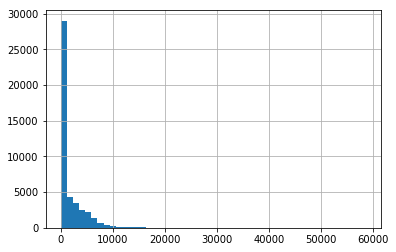

In [6]:
dataset["content_size"].hist(bins=50);

Content size description:

In [7]:
dataset["content_size"].describe()

count    44846.000000
mean      1713.798979
std       2923.847913
min          1.000000
25%         99.000000
50%        344.000000
75%       2455.000000
max      58442.000000
Name: content_size, dtype: float64

Selecting articles with more than 300 characters

In [8]:
mask_size = dataset["content_size"] > 300
dataset = dataset[mask_size]

New histogram

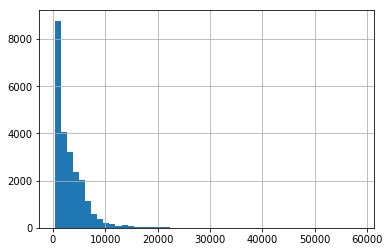

In [9]:
dataset["content_size"].hist(bins=50);

In [10]:
dataset["content_size"].describe()

count    23445.000000
mean      3176.511879
std       3444.411623
min        301.000000
25%        756.000000
50%       2303.000000
75%       4518.000000
max      58442.000000
Name: content_size, dtype: float64

Cleaning publication names

In [11]:
def clean_publication(publication):
    # Leaving only the domain
    return re.sub(r"(https?://)?(www([0-9])?\.)?", "", publication)

In [12]:
cleaned_publication = dataset["publication"].apply(clean_publication)

In [13]:
dataset["domain"] = cleaned_publication

In [14]:
dataset.head()

,title,publication,authors,date,year,month,url,content,content_size,domain
0,"Hillary Clinton: ‘China, if you’re listening, ...",https://www.washingtonpost.com,"['John Wagner', ""National Reporter Leading The...",05-02-2019,2019.0,5.0,https://www.washingtonpost.com/politics/hillar...,Hillary Clinton speaks at the Time 100 Summit ...,2114,washingtonpost.com
1,Exclusive: Foreign government leases at Trump ...,https://www.reuters.com,"['Julia Harte', 'Min Read']",05-02-2019,2019.0,5.0,https://www.reuters.com/article/us-usa-trump-e...,WASHINGTON (Reuters) - The U.S. State Departme...,8753,reuters.com
2,Trump's deal with Democrats leaves GOP rolling...,https://www.politico.com,"['Melanie Zanona', 'Burgess Everett', 'Megan C...",05-02-2019,2019.0,5.0,https://www.politico.com/story/2019/05/02/trum...,“I don’t see where the pay-fors will come from...,6213,politico.com
3,CNN Poll: Trump's approval rating on the econo...,https://www.cnn.com,['Grace Sparks'],05-02-2019,2019.0,5.0,https://www.cnn.com/2019/05/02/politics/cnn-po...,(CNN) President Donald Trump hits a new high o...,5689,cnn.com
4,Biden Faces Conflict of Interest Questions Tha...,https://www.nytimes.com,"['Kenneth P. Vogel', 'Iuliia Mendel']",05-01-2019,2019.0,5.0,https://www.nytimes.com/2019/05/01/us/politics...,The broad outlines of how the Bidens’ roles in...,1457,nytimes.com


### Pre selected news sources

Conservative news sorces and their bias level

In [15]:
conservative = {
    "reason.com": {
        "name": "Reason",
        "level": 1
    },
    "washingtontimes.com": {
        "name": "The Washington Times", 
        "level": 1
    },
    "nationareview.com": {
        "name": "National Review",
        "level": 2
    },
    "washingtonexaminer.com": {
        "name": "Washington Examiner",
        "level": 1
    },
    "thefederalist.com": {
        "name": "The Federalist",
        "level": 2
    },
    "foxnews.com": {
        "name": "Fox News",
        "level": 2
    },
    "nypost.com": {
        "name": "New York Post",
        "level": 2
    },
    "theblaze.com": {
        "name": "The Blaze",
        "level": 2
    },
    "dailycaller.com": {
        "name": "The Daily Caller",
        "level": 2
    },
    "dailywire.com": {
        "name": "The Daily Wire",
        "level": 2
    },
    "spectator.org": {
        "name": "Spectator",
        "level": 2
    }
}

Liberal news sources and their bias level

In [16]:
liberal = {
    "newyorker.com": {
        "name": "The New Yorker",
        "level": 2
    },
    "motherjones.com": {
        "name": "Mother Jones",
        "level": 2
    },
    "slate.com": {
        "name": "Slate",
        "level": 2
    },
    "msnbc.com": {
        "name": "MSNBC",
        "level": 2
    },
    "cnn.com": {
        "name": "CNN",
        "level": 2
    },
    "washingtonpost.com": {
        "name": "The Washington Post",
        "level": 1
    },
    "theguardian.com": {
        "name": "The Guardian",
        "level": 1
    },
    "nytimes.com": {
        "name": "The New York Times",
        "level": 1
    },
    "theatlantic.com": {
        "name": "The Atlantic",
        "level": 1
    },
    "nbcnews.com": {
        "name": "NBC News",
        "level": 1
    }
}

News sources considered "unbiased"

In [17]:
central = {
    "reuters.com": {
        "name": "Reuters",
        "level": 0
    },
    "csmonitor.com": {
        "name": "The Christian Science Monitor",
        "level": 0
    },
    "fivethirtyeight.com": {
        "name": "FiveThirtyEight",
        "level": 0
    },
    "bbc.com": {
        "name": "BBC News",
        "level": 0
    },
    "forbes.com": {
        "name": "Forbes",
        "level": 0
    }
}

In [50]:
all_sources = {**central, **liberal, **conservative}
selected_domains = all_sources.keys()

Some domains in the dataset doesn't contain content of they are not relevant.

In [46]:
domains_to_be_removed = [
    "radio.foxnews.com", 
    "video.foxnews.com", 
    "money.cnn.com",
    "s2.washingtonpost.com",
    "video.newyorker.com",
    "jobs.washingtonpost.com",
    "live.washingtonpost.com",
    "feeds.foxnews.com"
]

In [48]:
contains_text_to_be_removed=["cnn sport", "cnn business"]

In [51]:
# Filter to keep entries where the domain is valid
def keep_by_domain(domain):
    response = False
    for check in selected_domains:
        if (check in domain and domain not in domains_to_be_removed):
            response = True
    return response

In [52]:
# Filter to keep texts that doesn't contain texts that reference them as a non-relevant article
def keep_by_text(text):
    response = False
    for check in contains_text_to_be_removed:
        if check in text.lower():
            response = True
    
    return not response

In [24]:
mask_domain = dataset["domain"].apply(keep_by_domain)

In [25]:
mask_text = dataset["content"].apply(keep_by_text)

In [32]:
selected_dataset = dataset[(mask_domain & mask_text)].copy()

In [33]:
selected_dataset.shape

(7762, 10)

In [34]:
def normalize_domains(domain):
    response = domain
    for check in selected_domains:
        if check in domain:
            response = check
            
    return response

In [35]:
selected_dataset["domain"] = selected_dataset["domain"].apply(normalize_domains)

In [36]:
liberal_list = liberal.keys()
conservative_list = conservative.keys()

In [77]:
def bias_side(domain):
    if domain in liberal_list:
        response = 0
    elif domain in conservative_list:
        response = 1
    else:
        response = None
    
    return response

In [78]:
def bias_name(label):
    if label == 0:
        return "liberal"
    elif label == 1:
        return "conservative"
    else:
        return "central"

In [43]:
selected_dataset["label"] = selected_dataset["domain"].apply(bias_side)

In [79]:
selected_dataset["bias_name"] = selected_dataset["label"].apply(bias_name)

In [39]:
def bias_level(domain):
    domain_meta = all_sources.get(domain, {})
    return domain_meta.get("level")

In [40]:
selected_dataset["level"] = selected_dataset["domain"].apply(bias_level)

In [44]:
selected_dataset.head()

,title,publication,authors,date,year,month,url,content,content_size,domain,label,level
0,"Hillary Clinton: ‘China, if you’re listening, ...",https://www.washingtonpost.com,"['John Wagner', ""National Reporter Leading The...",05-02-2019,2019.0,5.0,https://www.washingtonpost.com/politics/hillar...,Hillary Clinton speaks at the Time 100 Summit ...,2114,washingtonpost.com,0.0,1
1,Exclusive: Foreign government leases at Trump ...,https://www.reuters.com,"['Julia Harte', 'Min Read']",05-02-2019,2019.0,5.0,https://www.reuters.com/article/us-usa-trump-e...,WASHINGTON (Reuters) - The U.S. State Departme...,8753,reuters.com,NaN,0
3,CNN Poll: Trump's approval rating on the econo...,https://www.cnn.com,['Grace Sparks'],05-02-2019,2019.0,5.0,https://www.cnn.com/2019/05/02/politics/cnn-po...,(CNN) President Donald Trump hits a new high o...,5689,cnn.com,0.0,2
4,Biden Faces Conflict of Interest Questions Tha...,https://www.nytimes.com,"['Kenneth P. Vogel', 'Iuliia Mendel']",05-01-2019,2019.0,5.0,https://www.nytimes.com/2019/05/01/us/politics...,The broad outlines of how the Bidens’ roles in...,1457,nytimes.com,0.0,1
8,Mark Meadows sends criminal referral targeting...,https://www.washingtonexaminer.com,[],05-02-2019,2019.0,5.0,https://www.washingtonexaminer.com/news/mark-m...,"Nellie Ohr, the wife of Justice Department off...",5229,washingtonexaminer.com,1.0,1


### Classes balance

In [80]:
news_count = selected_dataset.groupby(["domain", "bias_name", "level"]).count()["publication"].reset_index()
news_count.columns = ["domain", "bias_name", "level", "count"]

In [81]:
news_count

,domain,bias_name,level,count
0,bbc.com,central,0,439
1,cnn.com,liberal,2,1448
2,dailycaller.com,conservative,2,82
3,dailywire.com,conservative,2,358
4,fivethirtyeight.com,central,0,57
5,forbes.com,central,0,524
6,foxnews.com,conservative,2,906
7,motherjones.com,liberal,2,108
8,msnbc.com,liberal,2,158
9,nbcnews.com,liberal,1,508


**Number of articles by news sources**

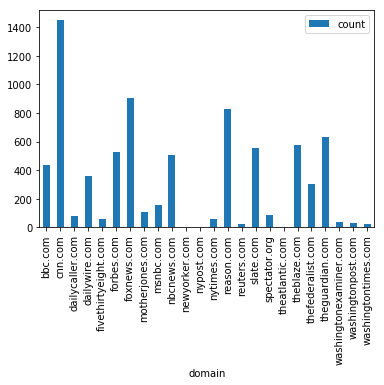

In [82]:
news_count.plot(kind="bar", x="domain", y="count");

**Number of articles by bias**

In [87]:
bias_count = news_count.groupby("bias_name").sum().reset_index()
bias_count["percentage"] = bias_count["count"] / bias_count["count"].sum() * 100
bias_count = bias_count[["bias_name", "percentage", "count"]]

In [88]:
bias_count

,bias_name,percentage,count
0,central,13.463025,1045
1,conservative,41.381087,3212
2,liberal,45.155888,3505


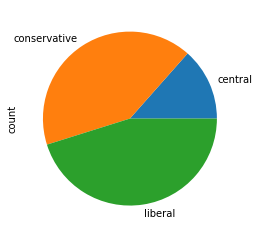

In [94]:
bias_count.set_index("bias_name").plot(kind="pie", y="count", legend=None);

**Number or articles by level**

In [116]:
news_by_level = pd.pivot_table(news_count[news_count["level"] > 0], columns="bias_name", index="level", aggfunc=np.sum)
news_by_level.columns = news_by_level.columns.droplevel()

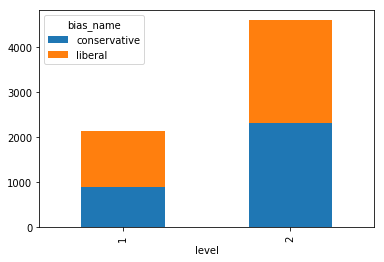

In [117]:
news_by_level.plot.bar(stacked=True);

In [118]:
news_by_level

bias_name,conservative,liberal
level,,
1,892,1237
2,2320,2268


### Exporting data

In [ ]:
selected_dataset.to_csv("../data_processed/selected_articles_webhose_google_news.csv")